### ASSIGNMENT 4

In [1]:
!pip3 install tabulate

In [2]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
df = pd.read_csv('car_sales.csv', index_col=0)

df.head(30)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


### Question 1
Create a table in jupyter notebook(markdown) with column 1 containing variable names and column 2 containing the data type (basically numeric or categorical)

In [4]:
df.info() # or dataframe.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
print(df.dtypes.to_markdown())

|                   | 0       |
|:------------------|:--------|
| symboling         | int64   |
| normalized-losses | object  |
| make              | object  |
| fuel-type         | object  |
| aspiration        | object  |
| num-of-doors      | object  |
| body-style        | object  |
| drive-wheels      | object  |
| engine-location   | object  |
| wheel-base        | float64 |
| length            | float64 |
| width             | float64 |
| height            | float64 |
| curb-weight       | int64   |
| engine-type       | object  |
| num-of-cylinders  | object  |
| engine-size       | int64   |
| fuel-system       | object  |
| bore              | object  |
| stroke            | object  |
| compression-ratio | float64 |
| horsepower        | object  |
| peak-rpm          | object  |
| city-mpg          | int64   |
| highway-mpg       | int64   |
| price             | object  |


|                   | 0       |
|:------------------|:--------|
| symboling         | int64   |
| normalized-losses | object  |
| make              | object  |
| fuel-type         | object  |
| aspiration        | object  |
| num-of-doors      | object  |
| body-style        | object  |
| drive-wheels      | object  |
| engine-location   | object  |
| wheel-base        | float64 |
| length            | float64 |
| width             | float64 |
| height            | float64 |
| curb-weight       | int64   |
| engine-type       | object  |
| num-of-cylinders  | object  |
| engine-size       | int64   |
| fuel-system       | object  |
| bore              | object  |
| stroke            | object  |
| compression-ratio | float64 |
| horsepower        | object  |
| peak-rpm          | object  |
| city-mpg          | int64   |
| highway-mpg       | int64   |
| price             | object  |

### Question 2
  By creating a correlation heatmap with the numeric variables,
    (I) which variables are negatively correlated with price and what does the negative correlation mean?
    (II) which variables are positively correlated with price and what does the positive correlation mean?
    (III) List the first five variables that strongly correlate with the price.

In [6]:
# Cleaning the data
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.dropna(subset=['price', 'horsepower', 'peak-rpm'], axis=0, inplace=True)

df.isnull().sum()

symboling             0
normalized-losses    35
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
# reset index
df = df.reset_index(drop=True)

In [9]:
# Convert important variables to numeric
df["price"] = pd.to_numeric(df["price"])
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"])
df["horsepower"] = pd.to_numeric(df["horsepower"])

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [10]:
# create new dataframe with numeric variables

df_numeric = df[['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

df_numeric

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,109.1,188.8,68.9,55.5,2952,141,9.5,114,5400,23,28,16845
195,-1,109.1,188.8,68.8,55.5,3049,141,8.7,160,5300,19,25,19045
196,-1,109.1,188.8,68.9,55.5,3012,173,8.8,134,5500,18,23,21485
197,-1,109.1,188.8,68.9,55.5,3217,145,23.0,106,4800,26,27,22470


### Correlation

In [11]:
# A basic example of a correlation heatmap

df_numeric.corr().style.background_gradient(cmap='coolwarm')

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.182446,0.076038,0.280635,-0.035228,0.036293,-0.082465
wheel-base,-0.537706,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.249088,0.371621,-0.360593,-0.472877,-0.543647,0.583797
length,-0.365957,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.161486,0.580309,-0.286321,-0.664865,-0.699033,0.693965
width,-0.243933,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.191254,0.615315,-0.245975,-0.633139,-0.681131,0.753871
height,-0.546717,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.259914,-0.087407,-0.311574,-0.051387,-0.105200,0.134990
curb-weight,-0.232893,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.156294,0.758063,-0.279375,-0.750287,-0.794937,0.835090
engine-size,-0.111110,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.029366,0.822713,-0.256773,-0.650552,-0.679688,0.873887
compression-ratio,-0.182446,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,1.000000,-0.214576,-0.436015,0.330587,0.268819,0.069549
horsepower,0.076038,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,-0.214576,1.000000,0.107882,-0.822617,-0.804596,0.810533
peak-rpm,0.280635,-0.360593,-0.286321,-0.245975,-0.311574,-0.279375,-0.256773,-0.436015,0.107882,1.000000,-0.115425,-0.058606,-0.101649


### Seaborn Correlation Heatmap

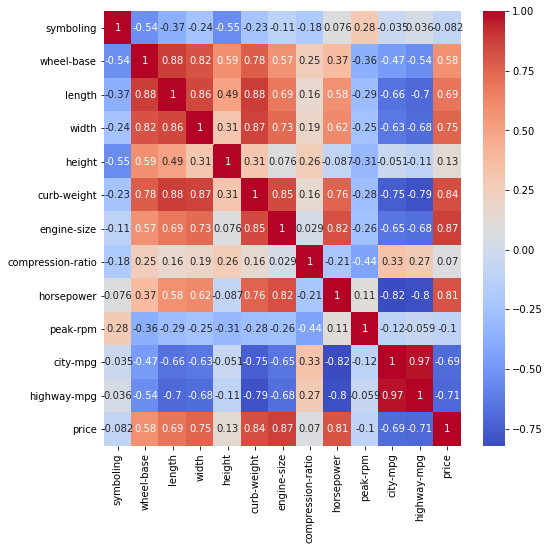

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

    (I) which variables are negatively correlated with price and what does the negative correlation mean?
   
   ANS: 
   Variables:
   - Symboling
   - City-mpg
   - Highway-mpg
   - Peak-rpm
   
Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. In statistics, a perfect negative correlation is represented by the value -1
    
    (II) which variables are positively correlated with price and what does the positive correlation mean?
    
      ANS: 
   Variables:
   - Engine-size
   - Curb-weight
   - Width
   - Horsepower
   - Length
   - Wheel-base
   - Height
   - Compression-ratio
   
Positive correlation is a relationship between two variables in which both variables move in tandem—that is, in the same direction. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.
In statistics, a perfect positive correlation is represented by the correlation coefficient value +1.0.

    (III) List the first five variables that strongly correlate with the price.
    
    ANS: 
    Variables:
   - Engine-size
   - Curb-weight
   - Horsepower
   - Width
   - Length

### QUESTION 3
    
    Produce a scatter plot with line of best fit following pairs of variables:
    (I) engine – size and price. 
    (II) highway-mpg and price
    (III) peak-rpm and price
(Hint: use regplot function from seaborn)

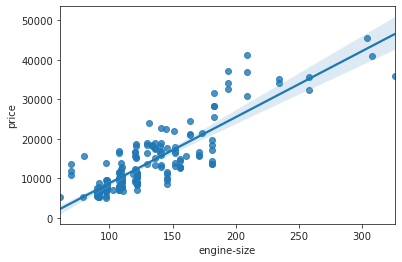

In [13]:
# engine – size and price. 

sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='engine-size', y='price', data=df_numeric)

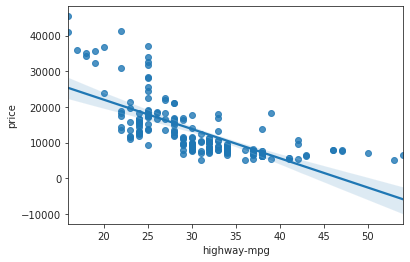

In [14]:
# highway-mpg and price. 

sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='highway-mpg', y='price', data=df_numeric)

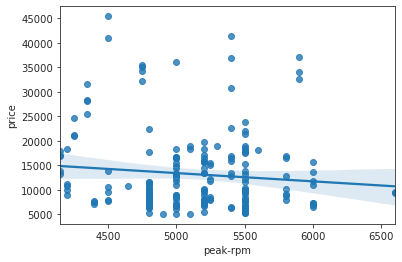

In [15]:
# peak-rpm and price. 

sns.set_style('white')
sns.set_style('ticks')

sns.regplot(x='peak-rpm', y='price', data=df_numeric)

### Question 4

Draw a boxplot using body-style and price. Interpret your results.

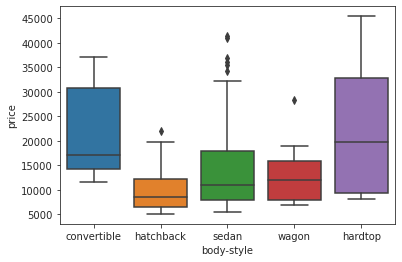

In [16]:
ax = sns.boxplot(x=df['body-style'] ,y=df_numeric['price'])

Interpret Results

For convertibles: Majority of the cars are above the mean and are priced between $17,500 - 37,500.
Convertible do not have any outliers

For Wagon: Although, wagon have outliers, it looks like the most consistent data, as the mean and median are close to each other and there are at the center of the data.

For Sedan: Sedans have a lot of outliers and majority of the prices are above the mean.

For Hatchback: Hatchbacks have the lowest mean relative price

For Hardtop: Hardtops have the highest mean relative price


### Question 5

Which drive-wheels type has the highest average price? (Hint: use the pandas groupby method or aggregate method)?

In [17]:
# Using groupby method
g = df.groupby('drive-wheels')
g

In [18]:
for drive_wheels, drive_wheels_df in g:
    print(drive_wheels)
    print(drive_wheels_df)

4wd
     symboling normalized-losses    make fuel-type aspiration num-of-doors  \
4            2               164    audi       gas        std         four   
134          2                83  subaru       gas        std          two   
138          0               102  subaru       gas        std         four   
139          0               102  subaru       gas      turbo         four   
142          0                85  subaru       gas        std         four   
143          0                85  subaru       gas      turbo         four   
148          0                81  toyota       gas        std         four   
149          0                91  toyota       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
4        sedan          4wd           front        99.4  ...          136   
134  hatchback          4wd           front        93.3  ...          108   
138      sedan          4wd           front        97.0  ...  

In [19]:
g.get_group('4wd')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
134,2,83,subaru,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603
138,0,102,subaru,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233
139,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,...,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
142,0,85,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
143,0,85,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694
148,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
149,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778


In [20]:
average_wheels = df.groupby("drive-wheels", as_index=True)[['price']].mean()
average_wheels

,price
drive-wheels,
4wd,10241.000000
fwd,9238.741379
rwd,19757.613333


#### ANS: rwd

### Question 6
Create 3 bins for horsepower namely low, medium and High. Draw a bar chart with the binned horsepower.

In [21]:
df['horsepower'].max()

262

In [22]:
df['horsepower'].min()

48

In [23]:
# Define bins as 48 to 128, 128 - 208, 208 -288
bins = [48, 128, 208, 288]

group_names = ['low', 'medium', 'high']

In [24]:
df_numeric['new_horsepower'] = pd.cut(df_numeric['horsepower'], bins, labels=group_names)

/home/ubanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_numeric

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,new_horsepower
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27,13495,low
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111,5000,21,27,16500,low
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154,5000,19,26,16500,medium
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,24,30,13950,low
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,18,22,17450,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,109.1,188.8,68.9,55.5,2952,141,9.5,114,5400,23,28,16845,low
195,-1,109.1,188.8,68.8,55.5,3049,141,8.7,160,5300,19,25,19045,medium
196,-1,109.1,188.8,68.9,55.5,3012,173,8.8,134,5500,18,23,21485,medium
197,-1,109.1,188.8,68.9,55.5,3217,145,23.0,106,4800,26,27,22470,low


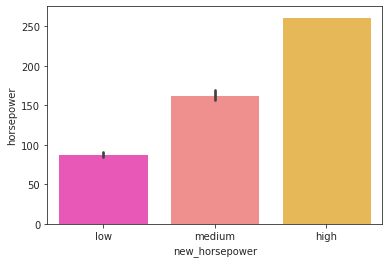

In [26]:
sns.barplot(x='new_horsepower', y='horsepower', data=df_numeric, palette='spring')

### The End